# Perceptron Basics
### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')
import sklearn
import mlxtend

In [3]:
df = pd.read_csv("placement_data.csv")

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(3)

,cgpa,resume_score,placed
136,0.03,2.76,0
825,0.08,4.36,0
416,2.19,2.97,0


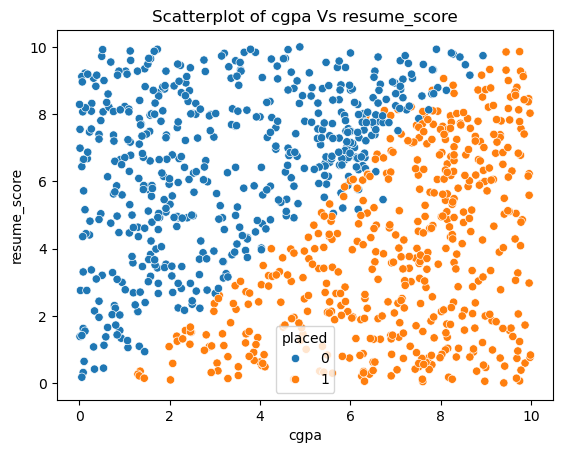

In [6]:
sns.scatterplot(data = df, x = 'cgpa', y = 'resume_score', hue='placed')
plt.title("Scatterplot of cgpa Vs resume_score")
plt.show()

In [7]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
from sklearn.linear_model import  Perceptron

In [10]:
P = Perceptron()

In [11]:
P.fit(X_train,y_train)

Perceptron()

In [12]:
P.coef_

array([[ 81.72, -77.35]])

In [13]:
P.intercept_

array([-72.])

In [14]:
from mlxtend.plotting import plot_decision_regions

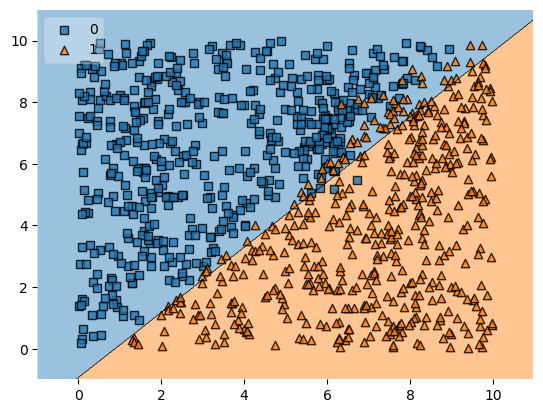

In [15]:
plot_decision_regions(X.values, y.values,clf = P, legend=2)
plt.show()

In [16]:
y_pred  = pd.Series(P.predict(X_test))
y_pred

0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64

In [17]:
y_test

521    0
737    1
740    0
660    0
411    0
      ..
436    1
764    1
88     1
63     1
826    1
Name: placed, Length: 100, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[42,  0],
       [ 8, 50]], dtype=int64)

In [20]:
from mlxtend.plotting import plot_confusion_matrix

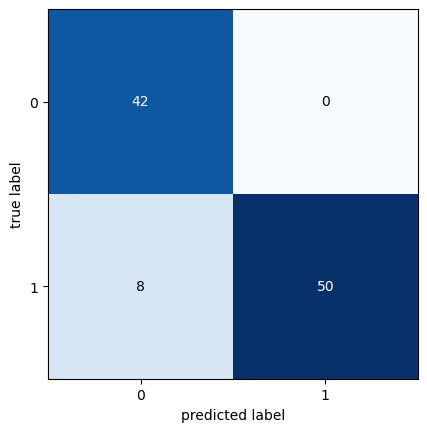

In [21]:
plot_confusion_matrix(Confusion_matrix)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9310344827586207

## Trying for XOR data

In [24]:
x1 = np.array([])
x2 = np.array([])
for i in range(1000):
    random_1 = np.round(np.random.randint(0,100))
    random_2 = np.round(np.random.randint(0,30))
    x1 = np.append(x1,random_1)
    x2 = np.append(x2,random_2)
output = np.array([])
for i in range(1000):
    if x1[i]%2 ==0 and x2[i]%2 ==0:
        output = np.append(output,0)
    else:
        output = np.append(output,1)
df_xor = pd.DataFrame([])
df_xor['x1'] = x1
df_xor['x2'] = x2
df_xor['output'] = output
df_xor.head(3)

,x1,x2,output
0,82.0,9.0,1.0
1,44.0,4.0,0.0
2,7.0,16.0,1.0


In [25]:
df_xor.shape

(1000, 3)

In [26]:
df_xor = df_xor.astype(int)

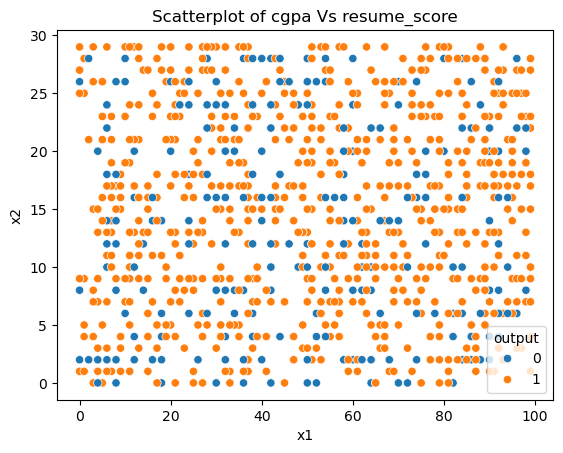

In [27]:
sns.scatterplot(data = df_xor, x = 'x1', y = 'x2', hue='output')
plt.title("Scatterplot of cgpa Vs resume_score")
plt.show()

In [28]:
X = df_xor.iloc[:,:2]
y = df_xor.iloc[:,-1]

In [29]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
P.fit(X_train,y_train)

Perceptron()

In [31]:
P.coef_

array([[ 16., -12.]])

In [32]:
P.intercept_

array([-77.])

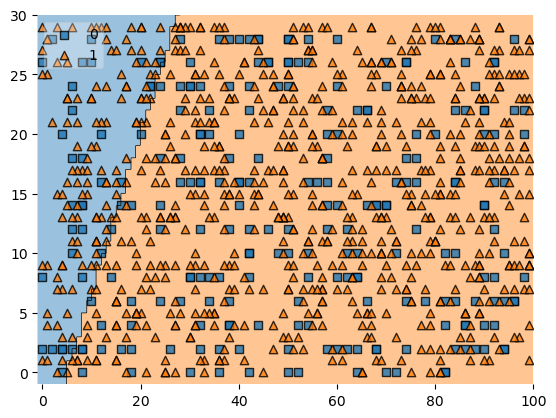

In [33]:
plot_decision_regions(X.values, y.values,clf = P, legend=2)
plt.show()

In [34]:
y_pred  = pd.Series(P.predict(X_test))
y_pred

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int32

In [35]:
y_test

521    1
737    0
740    1
660    1
411    0
      ..
436    0
764    1
88     0
63     1
826    1
Name: output, Length: 100, dtype: int32

In [36]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[ 2, 23],
       [ 7, 68]], dtype=int64)

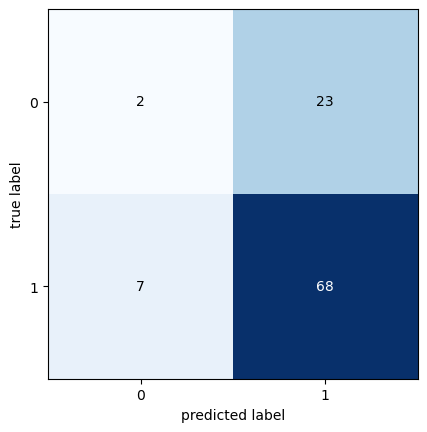

In [37]:
plot_confusion_matrix(Confusion_matrix)
plt.show()

### AUC plotting

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.4933333333333333